# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

### 1. DATA VALIDATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr

In [2]:
data = pd.read_csv('product_sales.csv')
data.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [3]:
# Checking for the number of columns and rows
num_rows, num_cols = data.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 15000
Number of columns: 8


In [4]:
# Showing all the columns present in the dataframe
print(data.columns.tolist())

['week', 'sales_method', 'customer_id', 'nb_sold', 'revenue', 'years_as_customer', 'nb_site_visits', 'state']


In [5]:
# Checking the dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [6]:
# Checking the statistics of the dataset
data.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


In [7]:
# Get the list of column names
column_names = data.columns

# Iterate over each column
for column in column_names:
    # Display the unique values in each of the column
    unique_values = data[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

Unique values in column 'week':
[2 6 5 4 3 1]

Unique values in column 'sales_method':
['Email' 'Email + Call' 'Call' 'em + call' 'email']

Unique values in column 'customer_id':
['2e72d641-95ac-497b-bbf8-4861764a7097'
 '3998a98d-70f5-44f7-942e-789bb8ad2fe7'
 'd1de9884-8059-4065-b10f-86eef57e4a44' ...
 '839653cb-68c9-48cb-a097-0a5a3b2b298b'
 'e4dad70a-b23b-407c-8bd3-e32ea00fae17'
 '4e077235-7c17-4054-9997-7a890336a214']

Unique values in column 'nb_sold':
[10 15 11  9 13  8 12  7 14 16]

Unique values in column 'revenue':
[   nan 225.47  52.55 ...  44.34  45.01  64.9 ]

Unique values in column 'years_as_customer':
[ 0  1  6  3 10  9  7  4  2 20  8  5 17 36 15 14 19 13 12 11 30 24 22 18
 26 23 32 16 39 25 33 21 31 27 34 28 29 35 38 37 63 47]

Unique values in column 'nb_site_visits':
[24 28 26 25 22 31 23 30 21 27 32 29 20 18 19 35 16 17 33 36 34 15 37 14
 13 12 41]

Unique values in column 'state':
['Arizona' 'Kansas' 'Wisconsin' 'Indiana' 'Illinois' 'Mississippi'
 'Georgia' 'Oklahoma'

In [8]:
# Replace "em + call" with "Email + Call"
data['sales_method'] = data['sales_method'].replace('em + call', 'Email + Call')

# Replace "email" with "Email"
data['sales_method'] = data['sales_method'].replace('email', 'Email')

# Checking the dataframe again for the "sales_method" column
print(data['sales_method'].unique())

['Email' 'Email + Call' 'Call']


In [9]:
# Replacing the null values inside column "revenue" to 0 (integer)
data["revenue"] = data["revenue"].fillna(0).astype(float)

# Rounding the values in the "revenue" column to 2 decimal places
data["revenue"] = data["revenue"].round(2)

# Checking the dataset info again for column "revenue"
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            15000 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [10]:
# Replacing the outliers (39, 47 and 63 years) specific values in the "years_as_customer" column with 38 years (maximum number of years)
data['years_as_customer'].replace([39, 47, 63], 38, inplace=True)

# Verify the updated values
print(data['years_as_customer'].unique())

[ 0  1  6  3 10  9  7  4  2 20  8  5 17 36 15 14 19 13 12 11 30 24 22 18
 26 23 32 16 38 25 33 21 31 27 34 28 29 35 37]


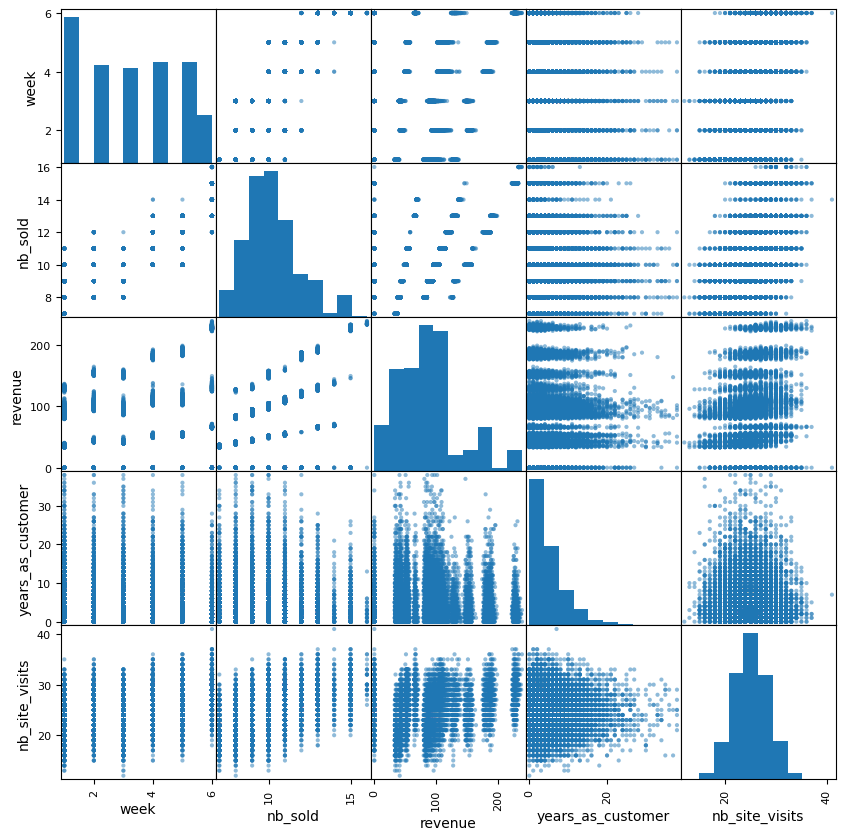

In [11]:
# Create a scatter matrix plot of all variables
pd.plotting.scatter_matrix(data, figsize=(10,10), diagonal='hist')

# Show the plot
plt.show()

### 2a. EXPLORATORY ANALYSIS - Single Variable `Graphics`

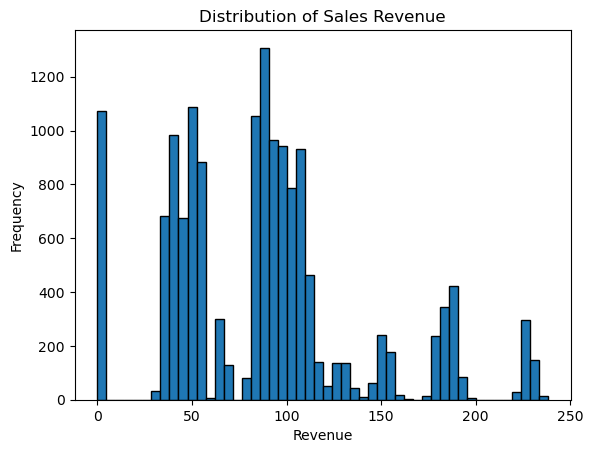

In [12]:
# Distribution of Sales Revenue chart
# Create a histogram of the 'revenue' column
plt.hist(data['revenue'], bins=50, edgecolor='black')

# Set the title and axis labels
plt.title('Distribution of Sales Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')

# Show the plot
plt.show()

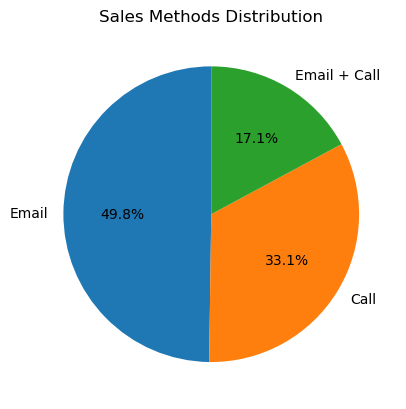

In [13]:
# Sales Method Distribution
# Create a pie chart of the 'sales_method' column
sales_method_counts = data['sales_method'].value_counts()
plt.pie(sales_method_counts, labels=sales_method_counts.index, autopct='%1.1f%%', startangle=90)

# Set the title
plt.title('Sales Methods Distribution')

# Show the plot
plt.show()

### 2b. EXPLORATORY ANALYSIS - Two or More Variable Graphics

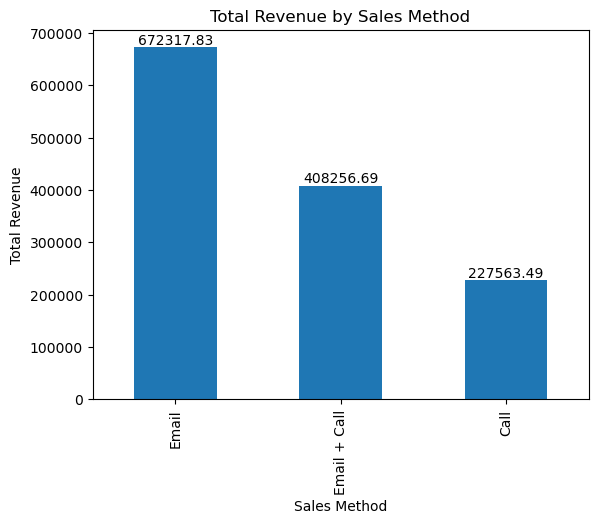

In [14]:
# Import the necessary libraries
import matplotlib.pyplot as plt

# Group the data by sales method and calculate the total revenue for each group
revenue_by_method = data.groupby('sales_method')['revenue'].sum()

# Sort the data by revenue in descending order
revenue_by_method = revenue_by_method.sort_values(ascending=False)

# Create a bar chart of the total revenue for each sales method
revenue_by_method.plot(kind='bar')

# Set the labels and title for the chart
plt.xlabel('Sales Method')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Sales Method')

# Add labels to the bars
for i, v in enumerate(revenue_by_method):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Display the chart
plt.show()

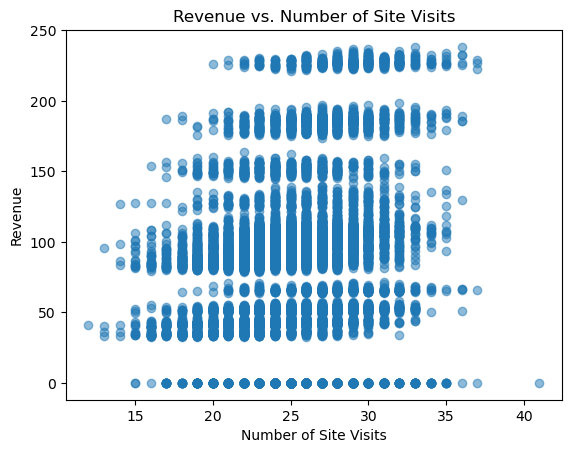

In [15]:
# 2 Variables Graphics 
# Create a scatter plot of the number of site visits vs. revenue
plt.scatter(data['nb_site_visits'], data['revenue'], alpha=0.5)
plt.xlabel('Number of Site Visits')
plt.ylabel('Revenue')
plt.title('Revenue vs. Number of Site Visits')
plt.show()

In [16]:
data['sales_method'].value_counts()

sales_method
Email           7466
Call            4962
Email + Call    2572
Name: count, dtype: int64

In [17]:
data.pivot_table(index='week',columns='sales_method',values='revenue')
# data.pivot_table(values='revenue', index='week', columns='sales_method')

sales_method,Call,Email,Email + Call
week,,,
1,34.510792,81.621865,114.090068
2,41.977665,92.793789,131.881150
3,40.185443,85.906209,135.758050
4,49.347254,100.268251,158.174141
5,51.262557,100.098856,161.130521
6,63.064554,120.338832,190.655352


In [31]:
f = data.pivot_table(values='revenue', index='week', columns='sales_method',aggfunc='sum')
f

sales_method,Call,Email,Email + Call
week,,,
1,26159.18,229765.55,16885.33
2,33792.02,137891.57,26376.23
3,36247.27,98792.14,48737.14
4,49593.99,107788.37,78296.20
5,53518.11,74373.45,126809.72
6,28252.92,23706.75,111152.07


<Axes: xlabel='week'>

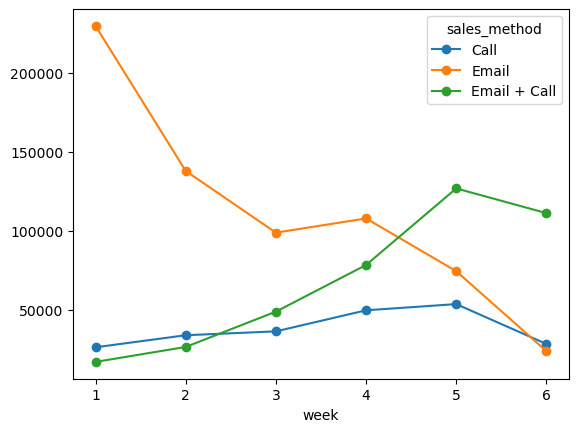

In [32]:
f.plot(kind='line', marker='o')

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='week'>

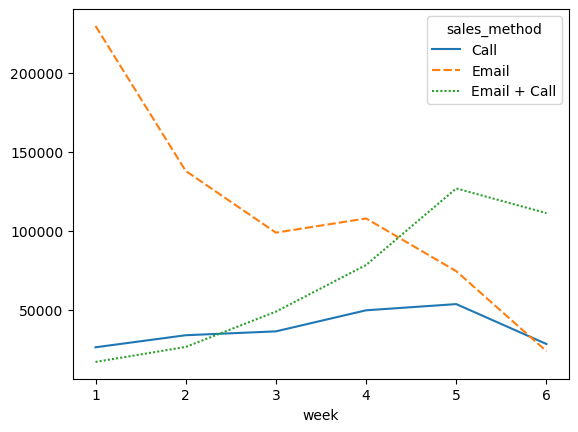

In [33]:
sns.lineplot(f)

<Axes: xlabel='week'>

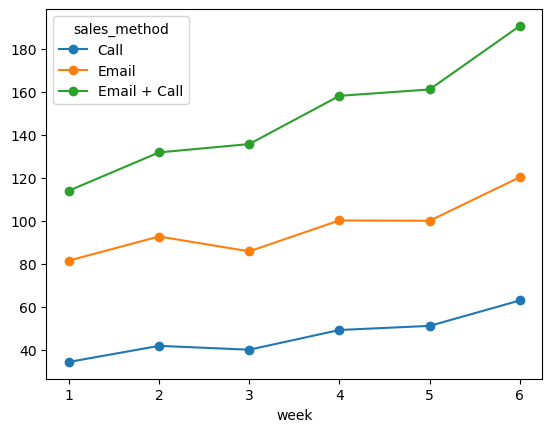

In [35]:
avg = data.pivot_table(values='revenue', index='week', columns='sales_method',aggfunc='mean')
avg.plot(kind='line', marker='o')

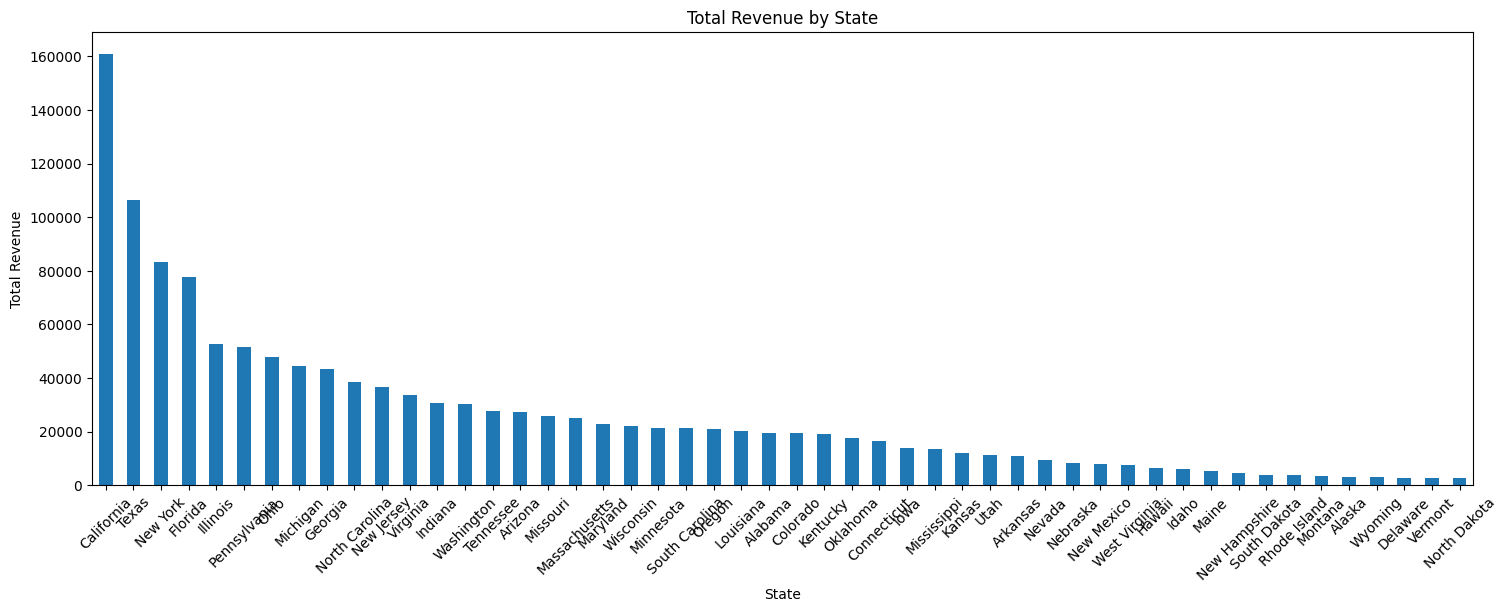

In [44]:
# Import the necessary libraries
import matplotlib.pyplot as plt

# Group the data by state and calculate the total revenue for each group
revenue_by_state = data.groupby('state')['revenue'].sum()

# Sort the data by revenue in descending order
revenue_by_state = revenue_by_state.sort_values(ascending=False)

# Set the figure size to accommodate the longer x-axis labels
plt.figure(figsize=(15, 6))

# Create a bar chart of the total revenue for each state
revenue_by_state.plot(kind='bar')

# Set the x-axis label rotation for better readability
plt.xticks(rotation=45)

# Adjust the spacing between the bars
plt.tight_layout()

# Set the labels and title for the chart
plt.xlabel('State')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by State')

# Display the chart
plt.show()

### 3a. Definition of a metric for the business to `monitor**`

Based on the analysis above, the business should monitor the total revenue generated by each sales method to determine which method is most effective in generating revenue. The bar chart of the total revenue by sales method clearly shows that the Email sales method is the most effective in generating revenue, followed by the Email+Call sales method, while the Call sales method generates the least revenue. Therefore, the business should consider allocating more resources and effort to the "Email" and "Email+Calls" methods, while also exploring ways to improve the website sales method. Additionally, the scatter plot of revenue versus the number of site visits indicates that there is a positive correlation between these two variables, suggesting that increasing the number of site visits may lead to higher revenue. Therefore, the business should consider implementing strategies to increase website traffic, such as improving search engine optimization (SEO) or running targeted advertising campaigns. By monitoring these metrics and implementing strategies to improve them, the business can effectively address the problem of declining revenue and improve its overall performance.

### 3b. Estimating initial value(s) for the metric based on the current data

Yes, we can estimate the initial value(s) for the metrics based on the current data. For example, we can calculate the total revenue generated from each sales method and use it as a baseline for monitoring future revenue generation. We can also calculate the average number of site visits and revenue generated per customer, which can be used to set benchmarks for future performance. These initial values can be used to track progress over time and identify areas where improvements can be made.

## 4. Recommendations for the Business

1. Increase the focus on Email as a sales method: The sales method distribution pie chart showed that Call is the least used sales method, accounting for only 17.3% of total revenue. The business can increase the focus on this sales method by training more sales representatives to use this method effectively and by promoting it to customers.
2. Enhance the website user experience: The scatter plot of revenue vs. number of site visits showed a positive correlation between the two variables. This suggests that increasing the number of site visits can lead to an increase in revenue. To achieve this, the business can enhance the website user experience by improving website design, speed, and navigation.
3. Encourage repeat business: The histogram of sales revenue showed that the majority of sales revenue is generated by a small percentage of customers. To increase sales revenue, the business can encourage repeat business by offering loyalty rewards and incentives to customers who have been buying from the company for a long time.
4. Consider expanding to new states: The bar chart of total revenue by state showed that some states, such as California and Texas, generate significantly higher revenue than others. The business can consider expanding to new states to increase its customer base and revenue.